# User Story 2 : Prétraitement des données - Gestion des valeurs manquantes et aberrantes

## Identifier et traiter les valeurs manquantes

In [1]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sbn
import numpy as np

#load data(le jeu de données est déjà nettoyé ; pas de valeurs manquantes ni de doublons)
file = r"B:\Machine Learning\Sprint1\YC2_DiabetesTrackAI\data\Cleaned_Data.csv"
content = pd.read_csv(file)


#valeurs manquantes
print(content.isnull().sum())

#valeur doublons
print(content.duplicated().sum())



insulin = (content["Insulin"] == 0).sum()
total_rows = len(content)
print(f"insulin : {insulin} | {(insulin/total_rows)*100:.2f}%  ")


bmi = (content["BMI"] == 0).sum()
print(f"BMI : {bmi} | {(bmi/total_rows)*100:.2f}%  ")

Glucose  = (content["Glucose"] == 0).sum()
print(f"Glucose  : {Glucose} | {(Glucose/total_rows)*100:.2f}%  ")

BloodPressure  = (content["BloodPressure"] == 0).sum()
print(f"BloodPressure  : {BloodPressure} | {(BloodPressure/total_rows)*100:.2f}%  ")

SkinThickness  = (content["SkinThickness"] == 0).sum()
print(f"SkinThickness  : {SkinThickness} | {(SkinThickness/total_rows)*100:.2f}%  ")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
0
insulin : 374 | 48.70%  
BMI : 11 | 1.43%  
Glucose  : 5 | 0.65%  
BloodPressure  : 35 | 4.56%  
SkinThickness  : 227 | 29.56%  


In [2]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
cols_with_zeros = ["Insulin","BMI","Glucose","BloodPressure","SkinThickness"]
for col in cols_with_zeros:
    content[col] = content[col].replace(0,np.nan)

content[cols_with_zeros] = imputer.fit_transform(content[cols_with_zeros])

content.head(30)
content.to_csv("../data/After_Knn.csv",index=False)

## Détection des valeurs aberrantes (outliers)

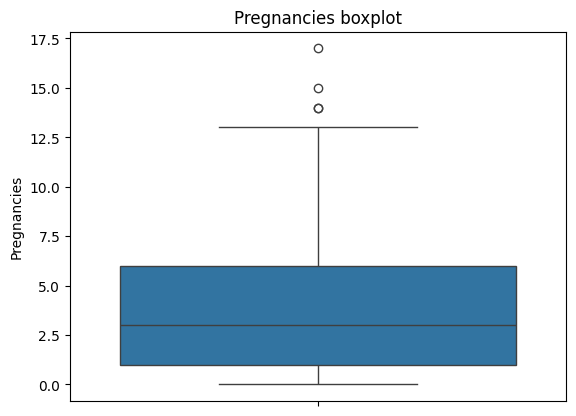

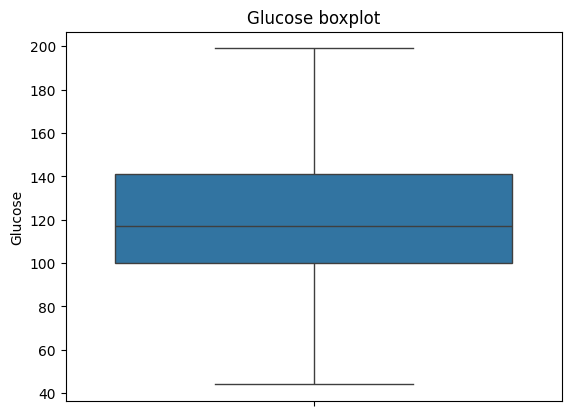

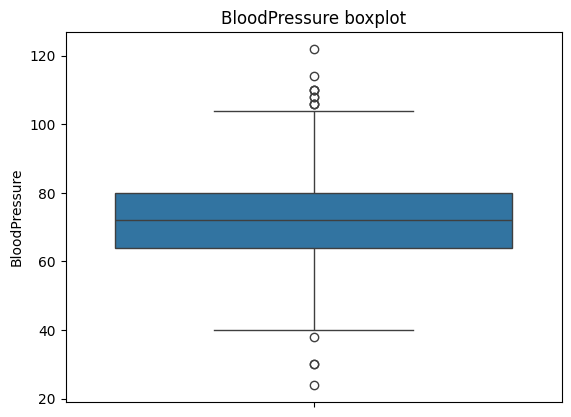

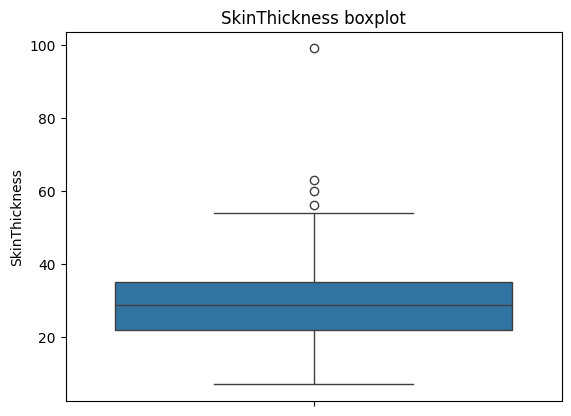

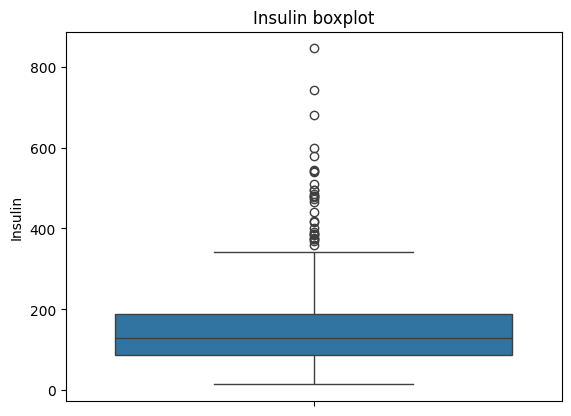

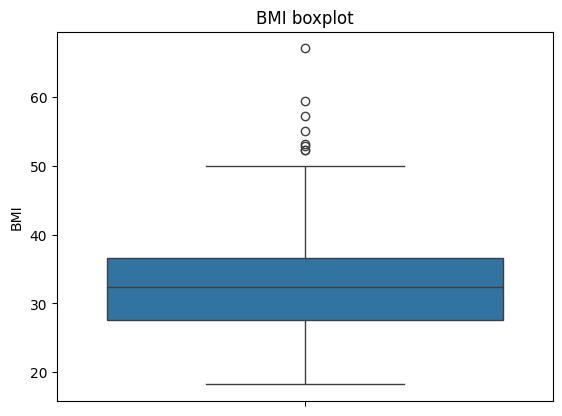

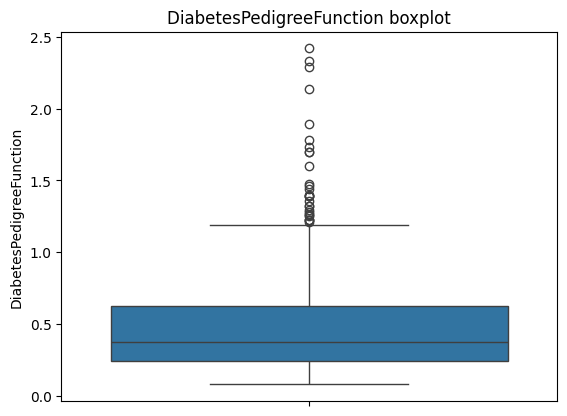

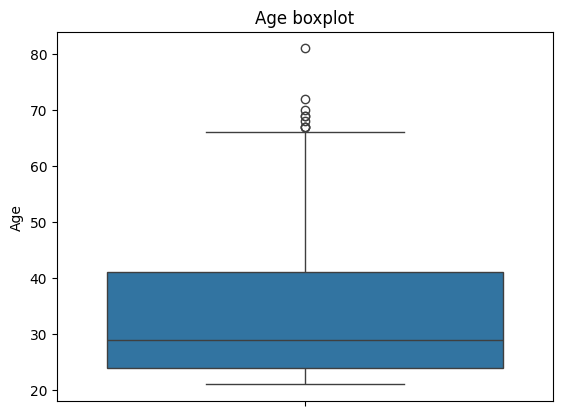

In [3]:
# boîte à moustaches des valeurs
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
            "Insulin","BMI","DiabetesPedigreeFunction","Age"]
            
for i,col in enumerate(cols,1):
    sbn.boxplot(y=content[col])
    mpt.title(f"{col} boxplot")
    mpt.show()




## Identification avec l’IQR

In [4]:
for col in cols:
    Q1 = content[col].quantile(0.25)   
    Q3 = content[col].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    print(f"{col} -> Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    outliers = content[(content[col]<lower_bound) | (content[col]>upper_bound)]


    print(outliers.count())


Pregnancies -> Lower bound: -6.5, Upper bound: 13.5
Pregnancies                 4
Glucose                     4
BloodPressure               4
SkinThickness               4
Insulin                     4
BMI                         4
DiabetesPedigreeFunction    4
Age                         4
dtype: int64
Glucose -> Lower bound: 37.875, Upper bound: 202.875
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
BloodPressure -> Lower bound: 40.0, Upper bound: 104.0
Pregnancies                 14
Glucose                     14
BloodPressure               14
SkinThickness               14
Insulin                     14
BMI                         14
DiabetesPedigreeFunction    14
Age                         14
dtype: int64
SkinThickness -> Lower bound: 2.5, Upper bound: 54.5
Pregnancies         

## Transformation logarithmique et visualisation des relations entre variables


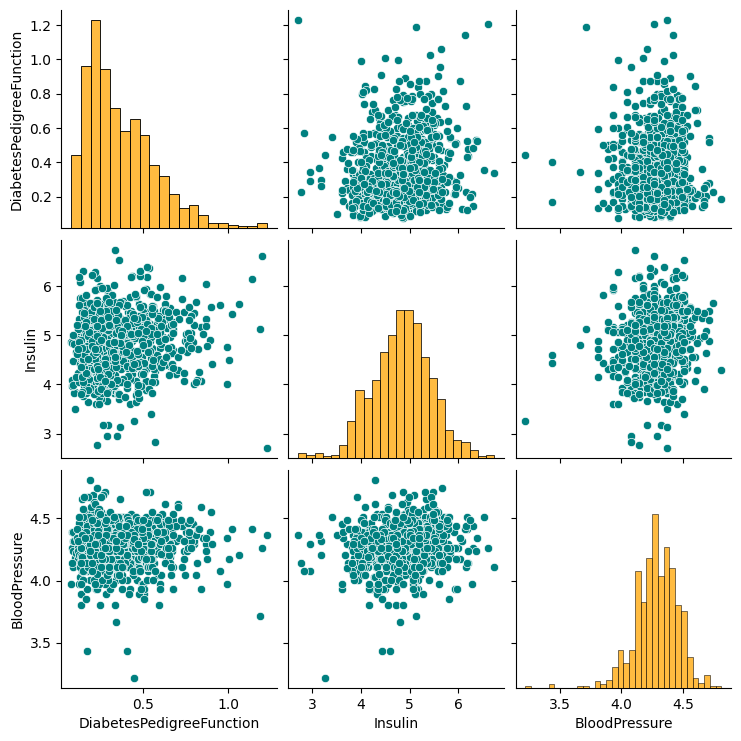

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,4.290459,35.0,5.347108,33.6,0.486738,50
1,1,85.0,4.204693,29.0,4.304065,26.6,0.300845,31
2,8,183.0,4.174387,29.4,5.951163,23.3,0.514021,32
3,1,89.0,4.204693,23.0,4.553877,28.1,0.154436,21
4,0,137.0,3.713572,35.0,5.129899,43.1,1.190279,33


In [5]:
import numpy as np

content_outliers = ["DiabetesPedigreeFunction","Insulin","BloodPressure"]
content2 = content[cols].copy()
for col in content_outliers:
    content2[col] = np.log1p(content2[col])

sbn.pairplot(content2[content_outliers],plot_kws={'color':'teal'},diag_kws={'color':'orange'})
mpt.show()
content2.head()



## Variables à forte variabilité


In [6]:
variability = content.std()
print(variability)

#Les variables Glucose et Insulin présentent la plus grande variabilité et sont donc 
# les plus informatives pour le modèle.
#Les autres variables ont une variabilité plus faible ou modérée, apportant moins 
#de discrimination entre les individus.

Pregnancies                  3.369578
Glucose                     30.463612
BloodPressure               12.196220
SkinThickness                9.486951
Insulin                     98.527048
BMI                          6.883870
DiabetesPedigreeFunction     0.331329
Age                         11.760232
dtype: float64


## Standardisation des variables numériques

In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
content2[cols] = scaler.fit_transform(content2[cols])
content2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862288,0.054979,0.644753,0.838548,0.165148,0.612059,1.425995
1,-0.844885,-1.207101,-0.439758,0.011894,-0.889580,-0.852384,-0.324994,-0.190672
2,1.233880,2.011949,-0.614571,0.054084,1.839357,-1.332078,0.749586,-0.105584
3,-0.844885,-1.075711,-0.439758,-0.620966,-0.475688,-0.634341,-1.063014,-1.041549
4,-1.141852,0.500966,-3.272736,0.644753,0.478673,1.546085,4.158488,-0.020496


In [8]:
content2.to_csv("../data/Ready_For_Model.csv",index=False)

In [9]:
import joblib

joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']